<div class="alert alert-block alert-danger">
    <b> Unraveling the cytoskeletal architecture of cancer cells: a novel computational approach to predict cell fate - CODE</b> 
    
 **5 - PROCESSING**
    
**Author**: Diogo Fróis Vieira
</div>

<div class="alert alert-block alert-info">
    
 **IMPORTS**
    
</div>

In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from packageCYSK.importing import *
from packageCYSK.preprocessingCYTO import *
from packageCYSK.processing import *
from packageCYSK.visualization import *
from packageCYSK.processing_LSF import *
from packageCYSK.processing_DCF import *
from packageCYSK.processing_CNF import *

print('📚 All libraries successfully imported 📚')

📚 All libraries successfully imported 📚


<div class="alert alert-block alert-info">
    
 **DIRECTORIES**
    
</div>

In [2]:
# Define dataset folder.
folder      = os.path.dirname(os.getcwd()) + "\\Datasets\\Set 1-a-tubulin_Sofia"

# Import images from CYTO, NUCL and RGB folders.
options     = ["CYTO","NUCL","RGB"]

# Dictionary with keys "CYTO", "NUCL", "RGB".
data = init_import(folder,options)

# Import ROIs
ROIs = pickle.load(open(folder + '//ROIs//ROIs_TEST.pkl', 'rb'))

# Import preprocessed products
data['NUCL_PRE'] = pd.read_pickle(folder + "\\NUCL_PRE\\NUCL_PRE_TEST.pkl") # pd.read_pickle(os.getcwd() + "\\NUCL_PRE_2D_StarDist.pkl") #
data['CYTO_PRE'] = pd.read_pickle(folder + "\\CYTO_PRE\\CYTO_PRE_TEST.pkl") 

>>> [CYTO] added.
>>> [NUCL] added.
>>> [RGB] added.


<div class="alert alert-block alert-info">
    
 **INSTRUCTIONS**
    
</div>

**OPTION 1:** Select a cell from the ROIs dataframe and individually process it

**OPTION 2:** Process the whole ROIs dataset and prepare for feature extraction

Then, visualize the results by selecting the desired cell. Save ```ResultsDF``` to apply feature extraction on the next notebook.

<div class="alert alert-block alert-info">
    
 **SELECT CELL**
    
</div>

In [3]:
def dropdown_cell_eventhandler(change):
    global cell
    cell = dropdown_image.value
    lab = ROIs['Label'][dropdown_image.value]
    print('Cell ' + str(cell) + ' (' + str(lab) +') selected.')

dropdown_image = widgets.Dropdown(description =  'Select Cell:' , options = ['...'] + list(ROIs.index))
dropdown_image.observe(dropdown_cell_eventhandler, names='value')
display(dropdown_image)

Dropdown(description='Select Cell:', options=('...', 0, 1), value='...')

Cell 1 (WT) selected.
Cell 0 (WT) selected.


<div class="alert alert-block alert-info">
    
 **PROCESS CELL**
    
</div>

In [10]:
ResultsDF = processing_cell(rowROI           = ROIs.loc[cell],
                            data             = data,
                            LSFparams        = {'res_thr': 4})

ResultsDF

,Path,Name,Img Index,Label,Image Size,Resolution,Mask,Skeleton,Patch:Deconvoluted Cyto,Patch:Deconvoluted Nucl,Patch:Skeleton Max,Offset,Nucleus Contour,Nucleus Centroid,Lines
0,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"(1040, 1388)","(1, 0.16125, 0.16125)","([676, 676, 676, 676, 677, 677, 677, 677, 677,...","([688, 688, 688, 688, 689, 689, 690, 690, 690,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[676, 676, 676, 676, 677, 677, 677, 677, 677,...","[[677, 686], [676, 687], [675, 687], [674, 688...","(711.042, 677.249)","[((668.185, 687.963), (669.815, 692.037)), ((6..."
1,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"(1040, 1388)","(1, 0.16125, 0.16125)","([278, 278, 279, 279, 279, 279, 279, 279, 280,...","([288, 289, 289, 289, 290, 290, 290, 291, 291,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[278, 278, 279, 279, 279, 279, 279, 279, 280,...","[[704, 309], [703, 310], [702, 310], [701, 310...","(343.895, 716.822)","[((700.983, 288.06), (699.017, 294.94)), ((690..."
2,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"(1040, 1388)","(1, 0.16125, 0.16125)","([676, 676, 676, 676, 677, 677, 677, 677, 677,...","([688, 688, 688, 688, 689, 689, 690, 690, 690,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[676, 676, 676, 676, 677, 677, 677, 677, 677,...","[[677, 686], [676, 687], [675, 687], [674, 688...","(711.042, 677.249)","[((668.185, 687.963), (669.815, 692.037)), ((6..."
3,C:\Users\diogo\OneDrive - Universidade de Lisb...,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"(1040, 1388)","(1, 0.16125, 0.16125)","([278, 278, 279, 279, 279, 279, 279, 279, 280,...","([288, 289, 289, 289, 290, 290, 290, 291, 291,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[278, 278, 279, 279, 279, 279, 279, 279, 280,...","[[704, 309], [703, 310], [702, 310], [701, 310...","(343.895, 716.822)","[((700.983, 288.06), (699.017, 294.94)), ((690..."


<div class="alert alert-block alert-info">
    
 **PROCESSING DATAFRAME**
    
</div>

In [5]:
ResultsDF = df_processing_cell(data   = data,
                               ROIsDF = ROIs,
                               params = {'res_thr': 4 })

>>> Progress: 0.0% 0
>>> Progress: 50.0% 1


<div class="alert alert-block alert-info">
    
 **PLOT PROCESSED CELLS**
    
</div>

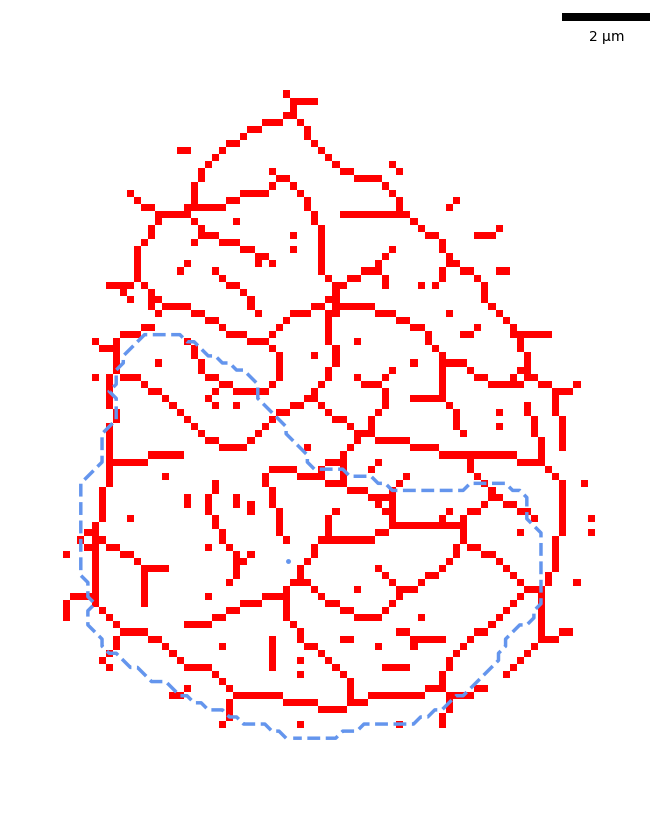

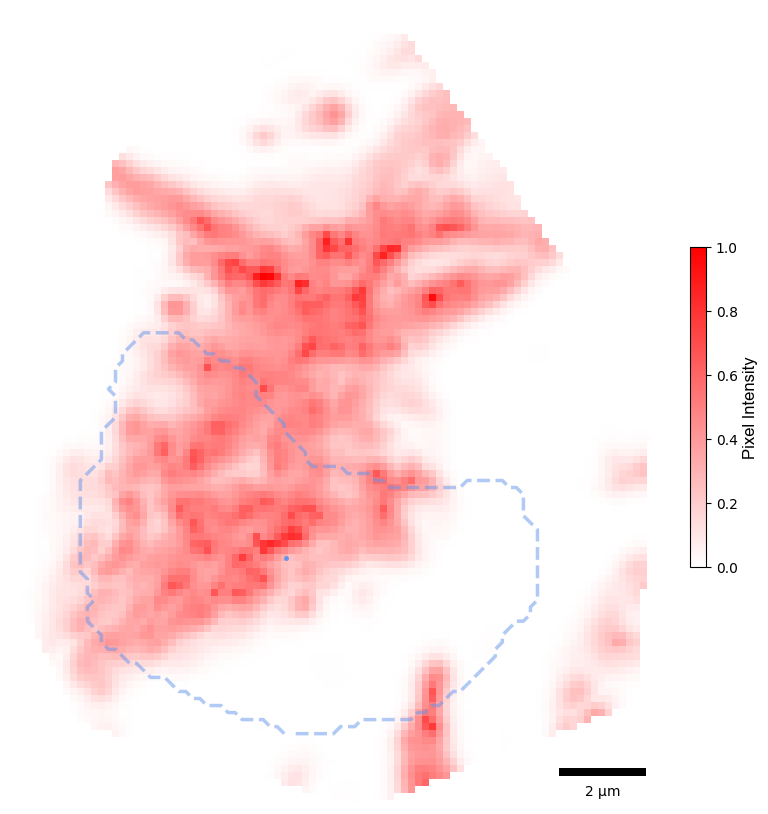

In [11]:
fig_int = intensity_plotter(ResultsRow = ResultsDF.loc[0],
                            data       = data,
                            save       = False)    

[113.0, 113.0]


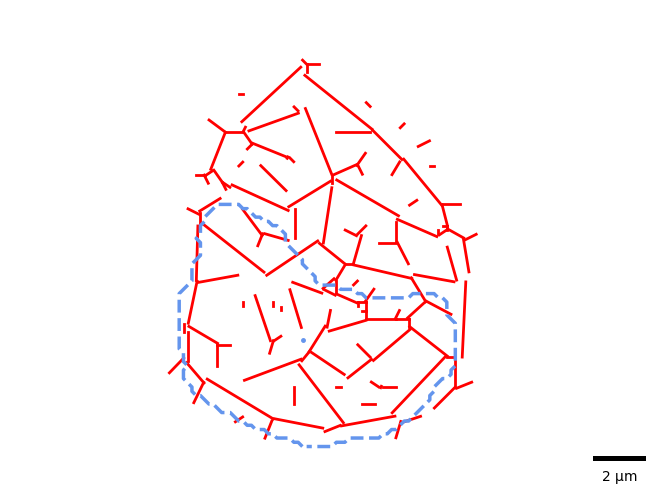

In [8]:
cmap     = pltc.rainbow
cm       = truncate_colormap(cmap, 0, 1, 300)

fig_lines = line_plotter(ResultsRow = ResultsDF.loc[0],
                                 data=data,
                                 feat=None,
                                 cmap=cm,
                                 normalize_bounds=1,
                                 colorbar_label=None,
                                 line_data_origin = 'Lines',
                                 overlay=True,
                                 save=False)

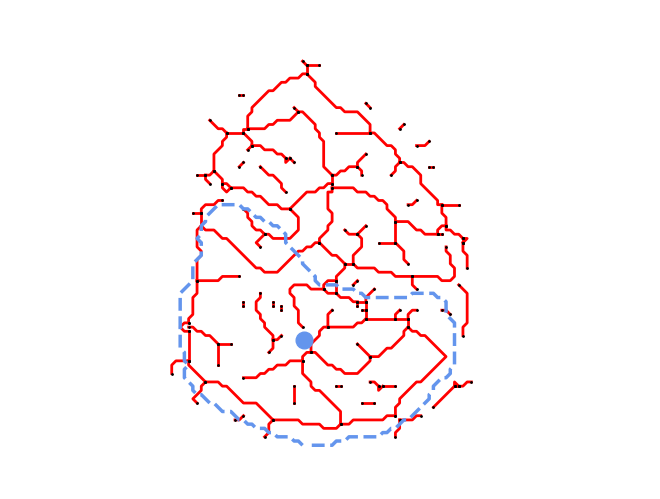

In [9]:
cmap     = pltc.rainbow
cm       = truncate_colormap(cmap, 0, 1, 300)

fig_graph = graph_plotter(ResultsRow       = ResultsDF.loc[0],
                          data             = data,
                          feat             = None,
                          cmap             = cm,
                          normalize_bounds = 'default',
                          colorbar_label   = None,
                          nodes            = True,
                          main_branch      = False,
                          overlay          = None,
                          scalebar         = False,
                          save             = False)

<div class="alert alert-block alert-info">
    
 **SAVE DATAFRAME FOR FEATURE EXTRACTION**
    
</div>

In [8]:
ResultsDF.to_pickle(folder + '//ResultsDF_TEST.pkl')   

---